##Observations:
1. Of the 3 drugs on which our analysis focused, Capomulin was the drug that showed the most reduction in Tumor Volume, slowest spread of metastatic sites, and highest survival rate in the test mice. As the treatment that showed consistantly positive results in all areas of analysis, Capomulin is the one I would recommend be advanced to the next round of study.

2. Of the 3 drugs on which our analysis focused, all saw an increase in metastatic site spread during the trial. Through most of the course of treatment all drugs were perfroming better than the Placebo; however, in the last days of the trial Ketapril spiked above the Placebo in spreading of metastakic sites. When comparing this late game increase in Ketapril's metastatic spread to the survival rate data, the increasingly steep decline in the survival rate during the last 10 days of the trial makes sense.

3. For tumor volume and metastatic spread Infubinol appears to consistantly perform better than the Placebo, especially in its ability to slow metastatic spread. However, when we look at the survival rate data for Infubinol it is inconsistant, moving above and below the Placebo survival rate. At the end of the trial Infubinol had the lowest survival rate of the 3 drugs studied. This mismatch in data returned for Infubinol is a little puzzling.


In [3]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem

In [4]:
# read csv 1
clinical_df = pd.read_csv("../raw_data/clinicaltrial_data.csv")

# sample school data table
clinical_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [5]:
# read csv 1
mouse_df = pd.read_csv("../raw_data/mouse_drug_data.csv")

# sample school data table
mouse_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [6]:
# merge data into 1 df
drug_test = pd.merge(mouse_df, clinical_df, on="Mouse ID")
drug_test.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


Organize treatment specific tables
    -Tumor Volume Change
    -Metastatic Site Change
    -Mouse Survival Rate

In [7]:
# capomulin
capo_df = drug_test.loc[drug_test["Drug"]=="Capomulin", :]
#capo_df.head(15)

In [8]:
# avg capo tumor volume to prepare plot
capo_tv = capo_df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
capo_tv

Timepoint
0     45.000000
5     44.266086
10    43.084291
15    42.064317
20    40.716325
25    39.939528
30    38.769339
35    37.816839
40    36.958001
45    36.236114
Name: Tumor Volume (mm3), dtype: float64

In [9]:
# calc std error of capo tumor volume for later use
capo_tvsem = capo_df.groupby("Timepoint")["Tumor Volume (mm3)"].sem()

capo_tvsem

Timepoint
0     0.000000
5     0.448593
10    0.702684
15    0.838617
20    0.909731
25    0.881642
30    0.934460
35    1.052241
40    1.223608
45    1.223977
Name: Tumor Volume (mm3), dtype: float64

In [10]:
# capo metastatic sites to prepare plot
capo_ms = capo_df.groupby("Timepoint")["Metastatic Sites"].mean()
capo_ms

Timepoint
0     0.000000
5     0.160000
10    0.320000
15    0.375000
20    0.652174
25    0.818182
30    1.090909
35    1.181818
40    1.380952
45    1.476190
Name: Metastatic Sites, dtype: float64

In [11]:
# calc std error of capo metastatic sites for later use
capo_mssem = capo_df.groupby("Timepoint")["Metastatic Sites"].sem()

capo_mssem

Timepoint
0     0.000000
5     0.074833
10    0.125433
15    0.132048
20    0.161621
25    0.181818
30    0.172944
35    0.169496
40    0.175610
45    0.202591
Name: Metastatic Sites, dtype: float64

In [12]:
# capo sort for mouse survival to prepare plot - plot all at end
capo_mouse = capo_df.groupby("Timepoint").count().iloc[:,0]
capo_mouse

Timepoint
0     25
5     25
10    25
15    24
20    23
25    22
30    22
35    22
40    21
45    21
Name: Mouse ID, dtype: int64

In [13]:
# calc Capomulin survival rate
capo_mousesr = []
for k in list(capo_mouse):
    capo_mousesr.append((k / capo_mouse[0])*100)
capo_mousesr

[100.0, 100.0, 100.0, 96.0, 92.0, 88.0, 88.0, 88.0, 84.0, 84.0]

In [14]:
# infubinol
infu_df = drug_test.loc[drug_test["Drug"]=="Infubinol", :]
#infu_df

In [15]:
# avg infu tumor volume to prepare plot
infu_tv = infu_df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
infu_tv

Timepoint
0     45.000000
5     47.062001
10    49.403909
15    51.296397
20    53.197691
25    55.715252
30    58.299397
35    60.742461
40    63.162824
45    65.755562
Name: Tumor Volume (mm3), dtype: float64

In [16]:
# calc std error of infu tumor volume for later use
infu_tvsem = infu_df.groupby("Timepoint")["Tumor Volume (mm3)"].sem()

infu_tvsem

Timepoint
0     0.000000
5     0.235102
10    0.282346
15    0.357705
20    0.476210
25    0.550315
30    0.631061
35    0.984155
40    1.055220
45    1.144427
Name: Tumor Volume (mm3), dtype: float64

In [17]:
# infu metastatic sites to prepare plot
infu_ms = infu_df.groupby("Timepoint")["Metastatic Sites"].mean()
infu_ms

Timepoint
0     0.000000
5     0.280000
10    0.666667
15    0.904762
20    1.050000
25    1.277778
30    1.588235
35    1.666667
40    2.100000
45    2.111111
Name: Metastatic Sites, dtype: float64

In [18]:
# calc std error of infu metastatic sites for later use
infu_mssem = infu_df.groupby("Timepoint")["Metastatic Sites"].sem()

infu_mssem

Timepoint
0     0.000000
5     0.091652
10    0.159364
15    0.194015
20    0.234801
25    0.265753
30    0.227823
35    0.224733
40    0.314466
45    0.309320
Name: Metastatic Sites, dtype: float64

In [19]:
# infu sort for mouse survival to prepare plot - plot all at end
infu_mouse = infu_df.groupby("Timepoint").count().iloc[:,0]
infu_mouse

Timepoint
0     25
5     25
10    21
15    21
20    20
25    18
30    17
35    12
40    10
45     9
Name: Mouse ID, dtype: int64

In [20]:
# calc Infubinol survival rate
infu_mousesr = []
for k in list(infu_mouse):
    infu_mousesr.append((k / infu_mouse[0])*100)
infu_mousesr

[100.0, 100.0, 84.0, 84.0, 80.0, 72.0, 68.0, 48.0, 40.0, 36.0]

In [21]:
# ketapril
keta_df = drug_test.loc[drug_test["Drug"]=="Ketapril", :]
#keta_df

In [22]:
# avg capo tumor volume to prepare plot
keta_tv = keta_df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
keta_tv

Timepoint
0     45.000000
5     47.389175
10    49.582269
15    52.399974
20    54.920935
25    57.678982
30    60.994507
35    63.371686
40    66.068580
45    70.662958
Name: Tumor Volume (mm3), dtype: float64

In [23]:
# calc std error of keta tumor volume for later use
keta_tvsem = keta_df.groupby("Timepoint")["Tumor Volume (mm3)"].sem()

keta_tvsem

Timepoint
0     0.000000
5     0.264819
10    0.357421
15    0.580268
20    0.726484
25    0.755413
30    0.934121
35    1.127867
40    1.158449
45    1.453186
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# keta metastatic sites to prepare plot
keta_ms = keta_df.groupby("Timepoint")["Metastatic Sites"].mean()
keta_ms

Timepoint
0     0.000000
5     0.304348
10    0.590909
15    0.842105
20    1.210526
25    1.631579
30    2.055556
35    2.294118
40    2.733333
45    3.363636
Name: Metastatic Sites, dtype: float64

In [25]:
# calc std error of keta metastatic sites for later use
keta_mssem = keta_df.groupby("Timepoint")["Metastatic Sites"].sem()

keta_mssem

Timepoint
0     0.000000
5     0.098100
10    0.142018
15    0.191381
20    0.236680
25    0.288275
30    0.347467
35    0.361418
40    0.315725
45    0.278722
Name: Metastatic Sites, dtype: float64

In [26]:
# keta sort for mouse survival to prepare plot - plot all at end
keta_mouse = keta_df.groupby("Timepoint").count().iloc[:,0]
keta_mouse

Timepoint
0     25
5     23
10    22
15    19
20    19
25    19
30    18
35    17
40    15
45    11
Name: Mouse ID, dtype: int64

In [27]:
# calc Ketapril survival rate
keta_mousesr = []
for k in list(keta_mouse):
    keta_mousesr.append((k / keta_mouse[0])*100)
keta_mousesr

[100.0, 92.0, 88.0, 76.0, 76.0, 76.0, 72.0, 68.0, 60.0, 44.0]

In [28]:
# placebo
plac_df = drug_test.loc[drug_test["Drug"]=="Placebo", :]
#plac_df

In [29]:
# avg plac tumor volume to prepare plot
plac_tv = plac_df.groupby("Timepoint")["Tumor Volume (mm3)"].mean()
plac_tv

Timepoint
0     45.000000
5     47.125589
10    49.423329
15    51.359742
20    54.364417
25    57.482574
30    59.809063
35    62.420615
40    65.052675
45    68.084082
Name: Tumor Volume (mm3), dtype: float64

In [30]:
# calc std error of plac tumor volume for later use
plac_tvsem = plac_df.groupby("Timepoint")["Tumor Volume (mm3)"].sem()

plac_tvsem

Timepoint
0     0.000000
5     0.218091
10    0.402064
15    0.614461
20    0.839609
25    1.034872
30    1.218231
35    1.287481
40    1.370634
45    1.351726
Name: Tumor Volume (mm3), dtype: float64

In [31]:
# plac metastatic sites to prepare plot
plac_ms = plac_df.groupby("Timepoint")["Metastatic Sites"].mean()
plac_ms

Timepoint
0     0.000000
5     0.375000
10    0.833333
15    1.250000
20    1.526316
25    1.941176
30    2.266667
35    2.642857
40    3.166667
45    3.272727
Name: Metastatic Sites, dtype: float64

In [32]:
# calc std error of plac metastatic sites for later use
plac_mssem = plac_df.groupby("Timepoint")["Metastatic Sites"].sem()

plac_mssem

Timepoint
0     0.000000
5     0.100947
10    0.115261
15    0.190221
20    0.234064
25    0.263888
30    0.300264
35    0.341412
40    0.297294
45    0.304240
Name: Metastatic Sites, dtype: float64

In [33]:
# plac sort for mouse survival to prepare plot - plot all at end
plac_mouse = plac_df.groupby("Timepoint").count().iloc[:,0]
plac_mouse

Timepoint
0     25
5     24
10    24
15    20
20    19
25    17
30    15
35    14
40    12
45    11
Name: Mouse ID, dtype: int64

In [34]:
# calc placebo survival rate
plac_mousesr = []
for k in list(plac_mouse):
    plac_mousesr.append((k / plac_mouse[0])*100)
plac_mousesr

[100.0, 96.0, 96.0, 80.0, 76.0, 68.0, 60.0, 56.000000000000007, 48.0, 44.0]

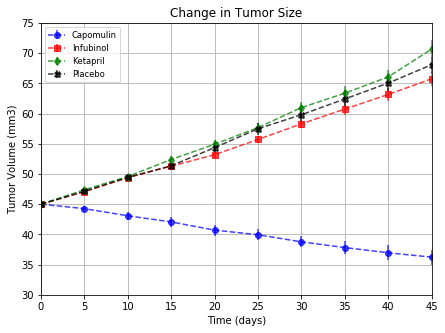

In [35]:
# plot the Tumor Volume of each drug on same chart
x_axis = np.arange(0, 50, 5)

fig, ax = plt.subplots(figsize=(7,5))

ax.errorbar(x_axis, capo_tv, yerr=capo_tvsem, fmt="--o", color="b",
            alpha=0.75, label="Capomulin")
ax.errorbar(x_axis, infu_tv, yerr=infu_tvsem, fmt="--s", color="r",
            alpha=0.75, label="Infubinol")
ax.errorbar(x_axis, keta_tv, yerr=keta_tvsem, fmt="--d", color="g",
            alpha=0.75, label="Ketapril")
ax.errorbar(x_axis, plac_tv, yerr=plac_tvsem, fmt="--X", color="k",
            alpha=0.75, label="Placebo")

ax.grid()
ax.set_xlim(0, 45, 5)
ax.set_ylim(30, 75, 5)

ax.set_xlabel("Time (days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.title("Change in Tumor Size")
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Change_in_Tumor_Size.png")
plt.show()

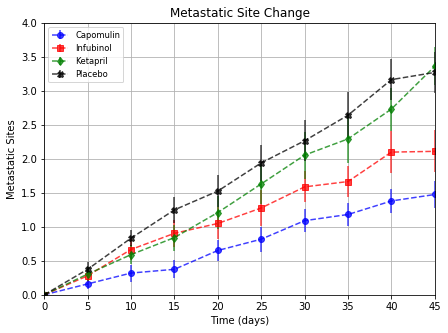

In [36]:
# plot the Metastatic Sites of each drug on same chart
x_axis = np.arange(0, 50, 5)

fig, ax = plt.subplots(figsize=(7,5))

ax.errorbar(x_axis, capo_ms, yerr=capo_mssem, fmt="--o", color="b",
            alpha=0.75, label="Capomulin")
ax.errorbar(x_axis, infu_ms, yerr=infu_mssem, fmt="--s", color="r",
            alpha=0.75, label="Infubinol")
ax.errorbar(x_axis, keta_ms, yerr=keta_mssem, fmt="--d", color="g",
            alpha=0.75, label="Ketapril")
ax.errorbar(x_axis, plac_ms, yerr=plac_mssem, fmt="--X", color="k",
            alpha=0.75, label="Placebo")

ax.grid()
ax.set_xlim(0, 45, 5)
ax.set_ylim(0, 4, .5)

ax.set_xlabel("Time (days)")
ax.set_ylabel("Metastatic Sites")

plt.title("Metastatic Site Change")
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Metastic_Site_Change.png")
plt.show()

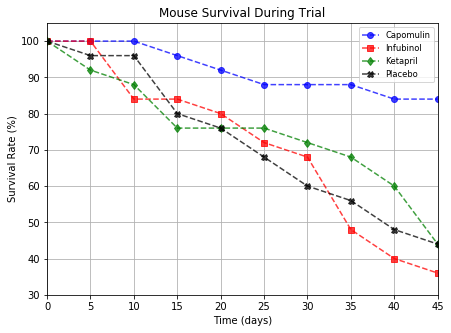

In [37]:
# plot the Mouse survival of each drug on same chart
x_axis = np.arange(0, 50, 5)

fig, ax = plt.subplots(figsize=(7, 5))

ax.plot(x_axis, capo_mousesr, "b--o", alpha=0.75, label="Capomulin") 
ax.plot(x_axis, infu_mousesr, "r--s", alpha=0.75, label="Infubinol")
ax.plot(x_axis, keta_mousesr, "g--d", alpha=0.75, label="Ketapril")
ax.plot(x_axis, plac_mousesr, "k--X", alpha=0.75, label="Placebo")

plt.grid()
plt.xlim(0, 45, 5)
plt.ylim(30, 105, 10)

plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")

plt.title("Mouse Survival During Trial")
plt.legend(loc="best", fontsize="small", fancybox=True)

plt.savefig("Mouse_Survival_During_Trial.png")
plt.show()

Organize for Bar chart showing % Tumer Volume change for each treatment from trial start to finish

In [38]:
# merge all drug tumor volume data
tv_dfs = [capo_tv, infu_tv, keta_tv, plac_tv]
con_tv = pd.concat(tv_dfs, axis=1, join='outer')

# give columns proper names
con_tv.columns = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

# swap axis
con_tv = con_tv.transpose()

# calc change in tumor volume
con_tv["Change"] = (((con_tv[0] / con_tv[45]) - 1)*-1)*100

# resort index and give columns proper names
con_tv2 = con_tv.reset_index().rename(columns = {"index":"Drug"})
con_tv2

Timepoint,Drug,0,5,10,15,20,25,30,35,40,45,Change
0,Capomulin,45.0,44.266086,43.084291,42.064317,40.716325,39.939528,38.769339,37.816839,36.958001,36.236114,-24.185502
1,Infubinol,45.0,47.062001,49.403909,51.296397,53.197691,55.715252,58.299397,60.742461,63.162824,65.755562,31.564725
2,Ketapril,45.0,47.389175,49.582269,52.399974,54.920935,57.678982,60.994507,63.371686,66.068580,70.662958,36.317412
3,Placebo,45.0,47.125589,49.423329,51.359742,54.364417,57.482574,59.809063,62.420615,65.052675,68.084082,33.905256


In [39]:
tv_perc = con_tv2.iloc[:, [0, 11]]
tv_perc


Timepoint,Drug,Change
0,Capomulin,-24.185502
1,Infubinol,31.564725
2,Ketapril,36.317412
3,Placebo,33.905256


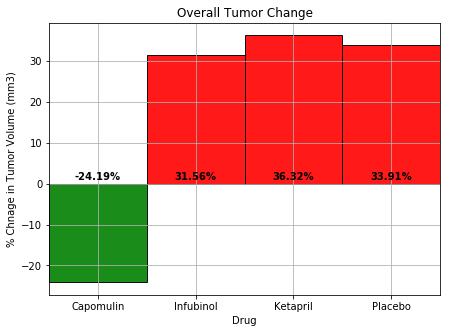

In [42]:
# plot bar chart of overall tumor change

x_axis = len(tv_perc)
c = ["g", "r", "r", "r"]
ec= ["k", "k", "k", "k"]
fig, ax = plt.subplots(figsize=(7, 5))

ax.bar(tv_perc["Drug"], tv_perc["Change"], color=c, width=1, edgecolor=ec, alpha=.9, 
       label=tv_perc["Change"])

for i, j in enumerate(tv_perc["Change"]):
    ax.annotate(((str(np.round(j, decimals=2))+"%")), xy=(i,1), ha="center", color="k", fontweight='bold')

# set title and axis labels
plt.title("Overall Tumor Change")
plt.xlabel("Drug")
plt.ylabel("% Chnage in Tumor Volume (mm3)")
plt.xlim(-0.5, len(tv_perc)-0.5)
plt.grid()

plt.savefig("Overall_Tumor_Change.png")
plt.show()